In [50]:
import pandas as pd
import numpy as np
import seaborn as sns

In [51]:
import pandas as pd
import numpy as np
import math
import pickle
from scipy.stats import kruskal, pearsonr, randint, uniform, chi2_contingency, boxcox
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, FunctionTransformer, StandardScaler, power_transform
from sklearn.linear_model import SGDClassifier
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, cross_validate, TimeSeriesSplit, RandomizedSearchCV, GridSearchCV, cross_val_predict
from datetime import datetime
from statsmodels.tsa.stattools import grangercausalitytests, adfuller, kpss, acf, pacf
from collections import defaultdict, OrderedDict
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from sklearn.decomposition import PCA
from statsmodels.tsa.ar_model import AR
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error
import seaborn as sb
import matplotlib.pyplot as plt 

%matplotlib inline

In [52]:
df_v2 = pd.read_csv("df_v2.csv")

In [53]:
df_v2

,date,temp_avg,temp_min,temp_max,temp_observ,precip,wind,casual,registered,total_cust,...,rain,fog,ice,datetime,year,month,dayOfWeek,season_spring,season_summer,season_fall
0,2011-01-01,5.20,-1.57,11.97,2.77,0.07,2.58,330.0,629.0,959.0,...,1,1,0,2011-01-01,2011,January,Saturday,1,0,0
1,2011-01-02,7.34,0.88,13.81,7.33,1.04,3.92,130.0,651.0,781.0,...,1,1,0,2011-01-02,2011,January,Sunday,1,0,0
2,2011-01-03,2.01,-3.44,7.46,-3.06,1.88,3.62,120.0,1181.0,1301.0,...,0,0,0,2011-01-03,2011,January,Monday,1,0,0
3,2011-01-04,-0.66,-5.96,4.64,-3.10,0.00,1.80,107.0,1429.0,1536.0,...,0,0,0,2011-01-04,2011,January,Tuesday,1,0,0
4,2011-01-05,0.91,-4.29,6.11,-1.77,0.00,2.95,82.0,1489.0,1571.0,...,0,0,0,2011-01-05,2011,January,Wednesday,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,2018-12-27,3.50,-3.59,9.12,-1.06,0.02,2.10,1150.0,4280.0,5430.0,...,0,1,0,2018-12-27,2018,December,Thursday,0,0,0
2918,2018-12-28,8.23,0.61,11.21,8.09,16.84,2.00,166.0,1959.0,2125.0,...,0,1,0,2018-12-28,2018,December,Friday,0,0,0
2919,2018-12-29,9.50,3.93,12.42,5.31,11.55,3.67,1756.0,4252.0,6008.0,...,0,1,0,2018-12-29,2018,December,Saturday,0,0,0
2920,2018-12-30,4.80,0.82,11.07,2.09,0.10,1.20,1295.0,3634.0,4929.0,...,0,0,0,2018-12-30,2018,December,Sunday,0,0,0


In [54]:
df_v2.describe()

,temp_avg,temp_min,temp_max,temp_observ,precip,wind,casual,registered,total_cust,holiday,rain,fog,ice,year,season_spring,season_summer,season_fall
count,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000
mean,14.072317,8.506598,19.015674,11.069251,3.435623,3.163042,1677.561602,6042.021561,7719.583162,0.030459,0.323751,0.631417,0.094456,2014.499658,0.247091,0.249144,0.251882
std,9.536753,9.473867,9.835377,9.481130,8.183749,1.379595,1560.840858,2757.419767,3746.759171,0.171875,0.467986,0.482503,0.292512,2.291531,0.431394,0.432592,0.434168
min,-12.100000,-16.990000,-7.980000,-15.660000,0.000000,0.380000,2.000000,19.000000,21.000000,0.000000,0.000000,0.000000,0.000000,2011.000000,0.000000,0.000000,0.000000
25%,6.000000,0.520000,11.080000,3.015000,0.010000,2.200000,510.250000,3828.500000,4621.250000,0.000000,0.000000,0.000000,0.000000,2012.250000,0.000000,0.000000,0.000000
50%,14.770000,8.505000,19.990000,11.620000,0.270000,2.900000,1217.500000,5959.000000,7439.000000,0.000000,0.000000,1.000000,0.000000,2014.500000,0.000000,0.000000,0.000000
75%,22.800000,17.337500,27.877500,19.767500,2.887500,3.880000,2355.000000,8183.750000,10847.750000,0.000000,1.000000,1.000000,0.000000,2016.000000,0.000000,0.000000,1.000000
max,32.030000,26.210000,37.850000,28.670000,118.790000,12.750000,10173.000000,15419.000000,19113.000000,1.000000,1.000000,1.000000,1.000000,2018.000000,1.000000,1.000000,1.000000


In [55]:
df_v2.columns

Index(['date', 'temp_avg', 'temp_min', 'temp_max', 'temp_observ', 'precip',
       'wind', 'casual', 'registered', 'total_cust', 'holiday', 'rain', 'fog',
       'ice', 'datetime', 'year', 'month', 'dayOfWeek', 'season_spring',
       'season_summer', 'season_fall'],
      dtype='object')

In [56]:
df_v2['total_cust']

0        959.0
1        781.0
2       1301.0
3       1536.0
4       1571.0
         ...  
2917    5430.0
2918    2125.0
2919    6008.0
2920    4929.0
2921    2401.0
Name: total_cust, Length: 2922, dtype: float64

<AxesSubplot:>

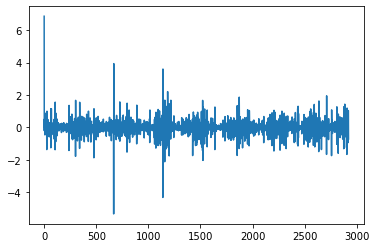

In [57]:
#In this step, we compute the difference of consecutive terms in the series. 
#Differencing is typically performed to get rid of the varying mean.
#We will also perform log transform
df_v2['total_cust_log'] = np.log(df_v2['total_cust'])
df_v2['total_cust_diff'] = df_v2['total_cust_log']-df_v2['total_cust_log'].shift(periods=1, freq=None, axis=0, fill_value=0)
df_v2['total_cust_diff'].dropna().plot()

When learning about time series, we came to know that to make to make time series stationary there are certain tests which needs to be done. These test are as per mentioned in the online resources available used for handling stationary time series.

In [59]:
#Augmented Dickey Fuller Test to make the time series stationary
def adf_test(df, col_names):
    for name in col_names:
        print ('Results of Augmented Dickey-Fuller Test for {}'.format(name))
        result_test = adfuller(df[name], autolag='AIC')
        result_output = pd.Series(result_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
        for key, val in result_test[4].items():
            result_output['Critical Value (%s)'%key] = val
        print (result_output)

In [60]:
testing_df = pd.DataFrame()
testing_features = [ 'precip','fog','temp_min', 'temp_max','wind','total_cust']

for col in testing_features:
    col_mean = df_v2[col].rolling(16).mean()[15:-1]
    col_std = df_v2[col].rolling(16).std()[15:-1]
    testing_df[col+'_mean16'] = col_mean.values
    testing_df[col+'_std16'] = col_std.values

In [61]:
## adf test for total_customers
from statsmodels.tsa.stattools import adfuller
adf_test(df_v2, ['total_cust'])

Results of Augmented Dickey-Fuller Test for total_cust
Test Statistic                   -3.068277
p-value                           0.028992
#Lags Used                       22.000000
Number of Observations Used    2899.000000
Critical Value (1%)              -3.432608
Critical Value (5%)              -2.862538
Critical Value (10%)             -2.567301
dtype: float64


In [63]:
# adf test for total_cust_total-2
adf_test(df_v2, ['total_cust_diff'])

Results of Augmented Dickey-Fuller Test for total_cust_diff
Test Statistic                -1.586558e+01
p-value                        9.106081e-29
#Lags Used                     2.500000e+01
Number of Observations Used    2.896000e+03
Critical Value (1%)           -3.432610e+00
Critical Value (5%)           -2.862539e+00
Critical Value (10%)          -2.567302e+00
dtype: float64


In [64]:
adf_test(testing_df, testing_df.columns)

Results of Augmented Dickey-Fuller Test for precip_mean16
Test Statistic                -8.653360e+00
p-value                        5.045121e-14
#Lags Used                     2.700000e+01
Number of Observations Used    2.878000e+03
Critical Value (1%)           -3.432624e+00
Critical Value (5%)           -2.862545e+00
Critical Value (10%)          -2.567305e+00
dtype: float64
Results of Augmented Dickey-Fuller Test for precip_std16
Test Statistic                -8.039646e+00
p-value                        1.861900e-12
#Lags Used                     1.600000e+01
Number of Observations Used    2.889000e+03
Critical Value (1%)           -3.432616e+00
Critical Value (5%)           -2.862541e+00
Critical Value (10%)          -2.567303e+00
dtype: float64
Results of Augmented Dickey-Fuller Test for fog_mean16
Test Statistic                -6.086270e+00
p-value                        1.062562e-07
#Lags Used                     1.700000e+01
Number of Observations Used    2.888000e+03
Critical

ADF (Augmented Dickey Fuller) Test:
The Dickey Fuller test is one of the statistical tests. It can be used to determine the presence of unit root in the series, and hence help us understand if the series is stationary or not. The null and alternate hypothesis of this test are as follows:

Null hypothesis  says Data is not stationary
Alternative hypothesis says Data is stationary

The results can be interpret as below:
-If critical value> test_statistic than null hypothesis is rejected ie data is stationary
-If critical value< test_statistic than null hypothesis is not rejected ie data is not stationar

There are advanced methods to check stationarity like trend stationarity,difference stationarity. To determine trend stationarity KPSS test is needed. here the results shows that  total_cust and total_cust_total-2 are not stationary at the 1%-level.

We need implemet KPSS test for the determination of stationarity trend in timeseries

In [65]:
#kwiatkowski-Phillips-Schmidt-Shin Test
from statsmodels.tsa.stattools import kpss

In [66]:
def kpss_test(df, col_names):
    for name in col_names:
        print ('Results of KPSS Test for {}'.format(name))
        result_test = kpss(df[name], regression='c', lags='legacy')
        result_output = pd.Series(result_test[0:3], index=['Test Statistic','p-value','Lags Used'])
        for key, val in result_test[3].items():
            result_output['Critical Value (%s)'%key] = val
        print (result_output)

In [67]:
# kpss test for total_cust
kpss_test(df_v2, ['total_cust'])

Results of KPSS Test for total_cust
Test Statistic            4.430839
p-value                   0.010000
Lags Used                28.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\Checkout\AppData\Local\Temp/ipykernel_5772/4212346322.py:4: FutureWarning: the 'lags'' keyword is deprecated, use 'nlags' instead
  result_test = kpss(df[name], regression='c', lags='legacy')
C:\Users\Checkout\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [68]:
# kpss test for total_cust_t-1
kpss_test(df_v2, ['total_cust_diff'])

Results of KPSS Test for total_cust_diff
Test Statistic            0.343231
p-value                   0.100000
Lags Used                28.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\Checkout\AppData\Local\Temp/ipykernel_5772/4212346322.py:4: FutureWarning: the 'lags'' keyword is deprecated, use 'nlags' instead
  result_test = kpss(df[name], regression='c', lags='legacy')
C:\Users\Checkout\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [69]:
# kpss test for total_cust
kpss_test(testing_df, testing_df.columns)

Results of KPSS Test for precip_mean16
Test Statistic            0.190734
p-value                   0.100000
Lags Used                28.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
Results of KPSS Test for precip_std16
Test Statistic            0.128136
p-value                   0.100000
Lags Used                28.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
Results of KPSS Test for fog_mean16
Test Statistic            0.416595
p-value                   0.070002
Lags Used                28.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
Results of KPSS Test for fog_std16
Test Statistic            0.419884
p-value                   0.068584
La

C:\Users\Checkout\AppData\Local\Temp/ipykernel_5772/4212346322.py:4: FutureWarning: the 'lags'' keyword is deprecated, use 'nlags' instead
  result_test = kpss(df[name], regression='c', lags='legacy')
C:\Users\Checkout\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
C:\Users\Checkout\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
C:\Users\Checkout\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
C:\U

Kwiatkowski-Phillips-Schmidt-Shin (KPSS):
KPSS test is a statistical test to check for stationarity of a series around a deterministic trend. Like ADF test, the KPSS test is also commonly used to analyse the stationarity of a series. However, it has couple of key differences compared to the ADF test in function and in practical usage. 

Null hypothesis  says Data is stationary
Alternative hypothesis says Data is not stationary

The results can be interpret as below:
-If critical value < test_statistic than null hypothesis is rejected ie data is not stationary
-If critical value >test_statistic than null hypothesis is not rejected ie data is stationar


Here to there are condition for the need of transformation based on the timeseries is difference or trend stationary.

No transformations are needed if timeseries is difference and trend stationary both
Transformations of total_cust is needed if timeseries is not difference but it is trend stationary 
Transformations of total_cust_total-2 is needed if timeseries is not difference as well as not trend stationary 